In [135]:
import pandas as pd 
import matplotlib.pyplot as plt

In [114]:
df_tmp = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [131]:
type(df_tmp)

pandas.core.frame.DataFrame

In [132]:
# Transform date into date time 
df_tmp['Date'] = pd.to_datetime(df_tmp['Date'], format="%m/%d/%Y")
# Select only from 1st January to 31st December 2017
df = df_tmp[df_tmp['Date'].dt.year < 2018]

In [133]:
df.head(10)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,2011-02-18,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
5,13027069804134,130270698,4134,ASSAULT,BATTERY,Tuesday,2013-04-02,15:50,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,44.0
6,17063991304134,170639913,4134,ASSAULT,BATTERY,Sunday,2017-08-06,18:15,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
7,16020415607020,160204156,7020,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,2016-03-03,19:30,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6068579904134,60685799,4134,ASSAULT,BATTERY,Saturday,2006-06-17,03:00,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5134166327195,51341663,27195,TRESPASS,TRESPASSING,Monday,2005-11-28,16:04,TENDERLOIN,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

In [122]:
# Total umbver of crimes 
total = df.shape[0]
total

2084466

In [123]:
# List the various categories of crime, how many are there
categories = df.Category.unique()
num_categories = len(df.Category.unique())
categories.sort()
categories

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'SECONDARY CODES',
       'SEX OFFENSES, FORCIBLE', 'SEX OFFENSES, NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'],
      dtype=object)

In [124]:
# Find unique id value
len(df['PdId'].unique()) == df.shape[0]

True

In [137]:
# Count the number of occurences of that uniquq id by category
df.groupby('Category').count()['PdId'].sort_values(ascending=False)

Category
LARCENY/THEFT                  464365
OTHER OFFENSES                 296411
NON-CRIMINAL                   231689
ASSAULT                        163158
VEHICLE THEFT                  124759
DRUG/NARCOTIC                  116352
VANDALISM                      111933
WARRANTS                        98234
BURGLARY                        88971
SUSPICIOUS OCC                  77392
ROBBERY                         53417
MISSING PERSON                  43297
FRAUD                           40540
FORGERY/COUNTERFEITING          22800
SECONDARY CODES                 21905
WEAPON LAWS                     20397
TRESPASS                        18681
PROSTITUTION                    16453
STOLEN PROPERTY                 11193
DISORDERLY CONDUCT               9838
DRUNKENNESS                      9676
RECOVERED VEHICLE                8688
SEX OFFENSES, FORCIBLE           8471
DRIVING UNDER THE INFLUENCE      5560
KIDNAPPING                       4228
ARSON                            3778
EMB

In [126]:
# Max frequency and min freq
max_inci = df.groupby('Category').count()['PdId'].max()
min_inci = df.groupby('Category').count()['PdId'].min()
max_inci, min_inci

(464365, 14)

In [127]:
cat_max = categories[df.groupby('Category').count()['PdId'] == max_inci]
cat_min = categories[df.groupby('Category').count()['PdId'] == min_inci]
cat_max, cat_min

(array(['LARCENY/THEFT'], dtype=object), array(['TREA'], dtype=object))

Text(0, 0.5, 'Occurences')

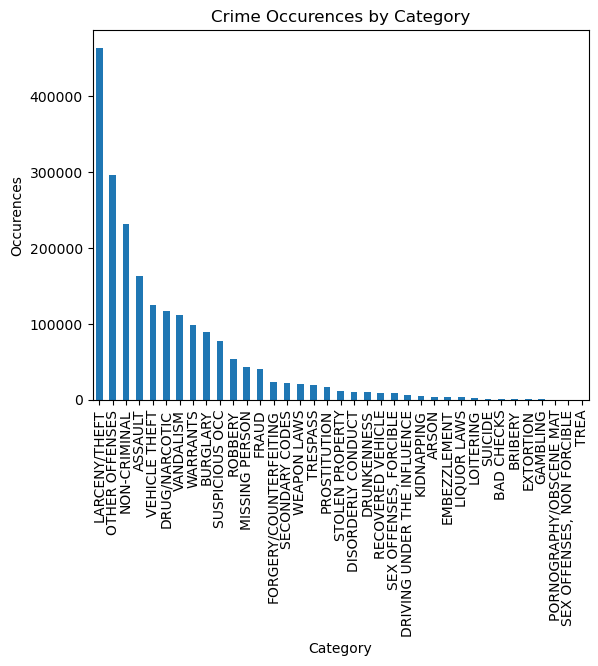

In [140]:
ax = df.groupby('Category').count()['PdId'].sort_values(ascending=False).plot.bar(title='Crime Occurences by Category')
ax.set_xlabel("Category")
ax.set_ylabel("Occurences")


In [155]:
# Ocuurences per year
years_occu = df.groupby(df.Date.dt.year).count()['PdId']
years_occu

Date
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
Name: PdId, dtype: int64

In [162]:
max_cirmes_year = years_occu.max()
min_cirmes_year = years_occu.min()
max_cirmes_year, min_cirmes_year

(151459, 126713)

In [163]:
years = df.Date.dt.year.unique()
years.sort()
years

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017])

In [164]:
max_cirmes_year = (years[years_occu == max_cirmes_year][0], max_cirmes_year)
min_cirmes_year = (years[years_occu == min_cirmes_year][0], min_cirmes_year)
max_cirmes_year, min_cirmes_year

((2015, 151459), (2011, 126713))

In [227]:
# Average Crime by year 
import numpy as np
np.mean(df.groupby(df.Date.dt.year)['PdId'].count().values)

138964.4

In [209]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes

{'ASSAULT',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'LARCENY/THEFT',
 'PROSTITUTION',
 'ROBBERY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WEAPON LAWS'}

In [194]:
df_focus = df[df.Category.isin(focuscrimes)]

In [228]:
grouped = df_focus.groupby(['Category', df_focus.Date.dt.year]).count()['PdId']
grouped
# by category find mean and std and plot them by category 

Category     Date
ASSAULT      2003    11409
             2004    10968
             2005    10154
             2006    10779
             2007    10900
                     ...  
WEAPON LAWS  2013     1435
             2014     1478
             2015     1590
             2016     1591
             2017     1644
Name: PdId, Length: 210, dtype: int64

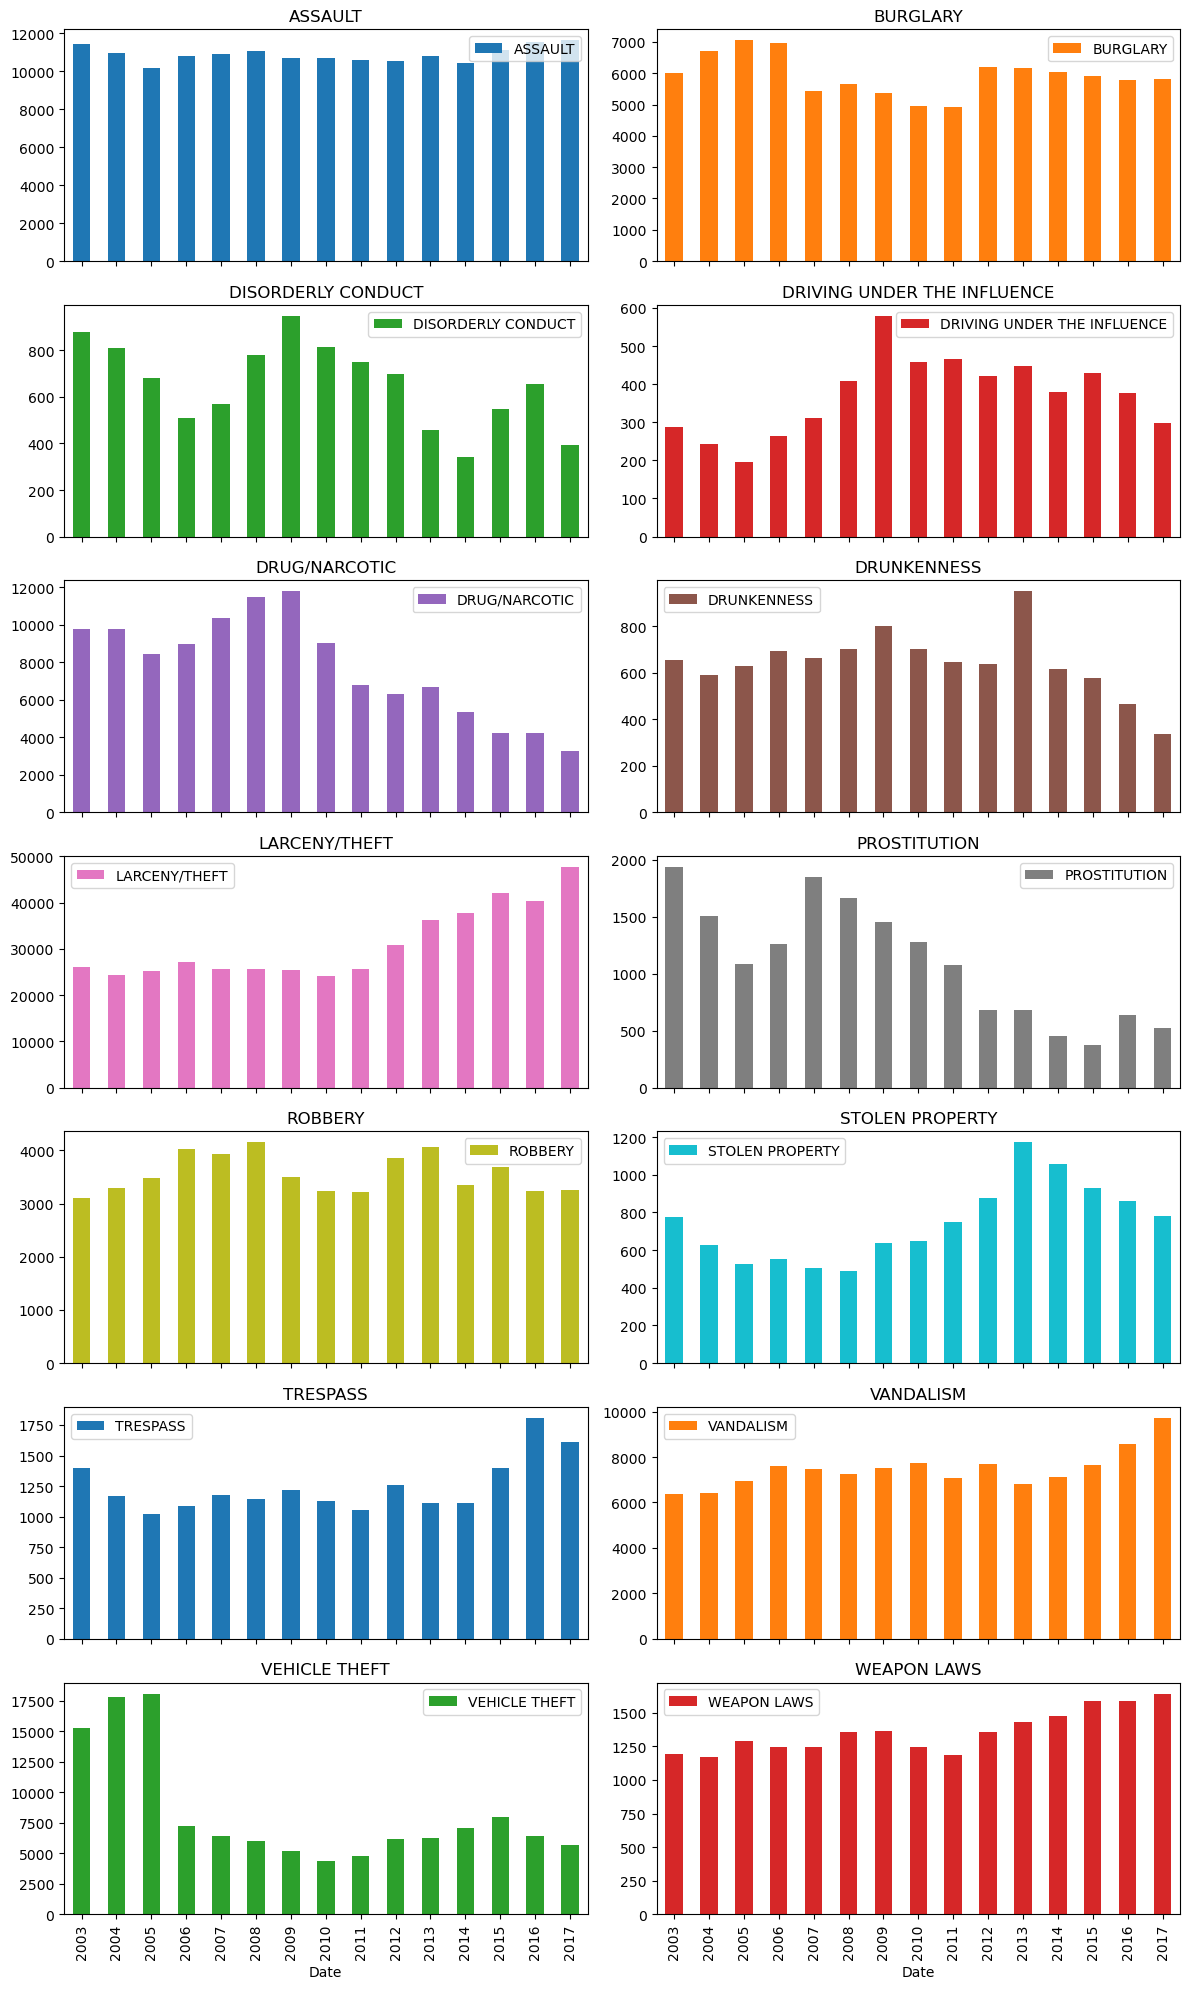

In [221]:
ax = grouped.unstack(level=0).plot(kind='bar', subplots=True, rot=90, figsize=(12, 20), layout=(7, 2))
plt.tight_layout()

We could say that not only the car theft is decreasing due technology but also the Drug/Narcotic. That's because thatks to technology we have better ways to track the iligal shipment of those.
Prositution is also decrasing among the years, that could be due to the feminims movement and the fact that women are starting to get same work conditions that men.

Disordered conduct it's decreasing due to the police enforcment 
